In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [2]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape


(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


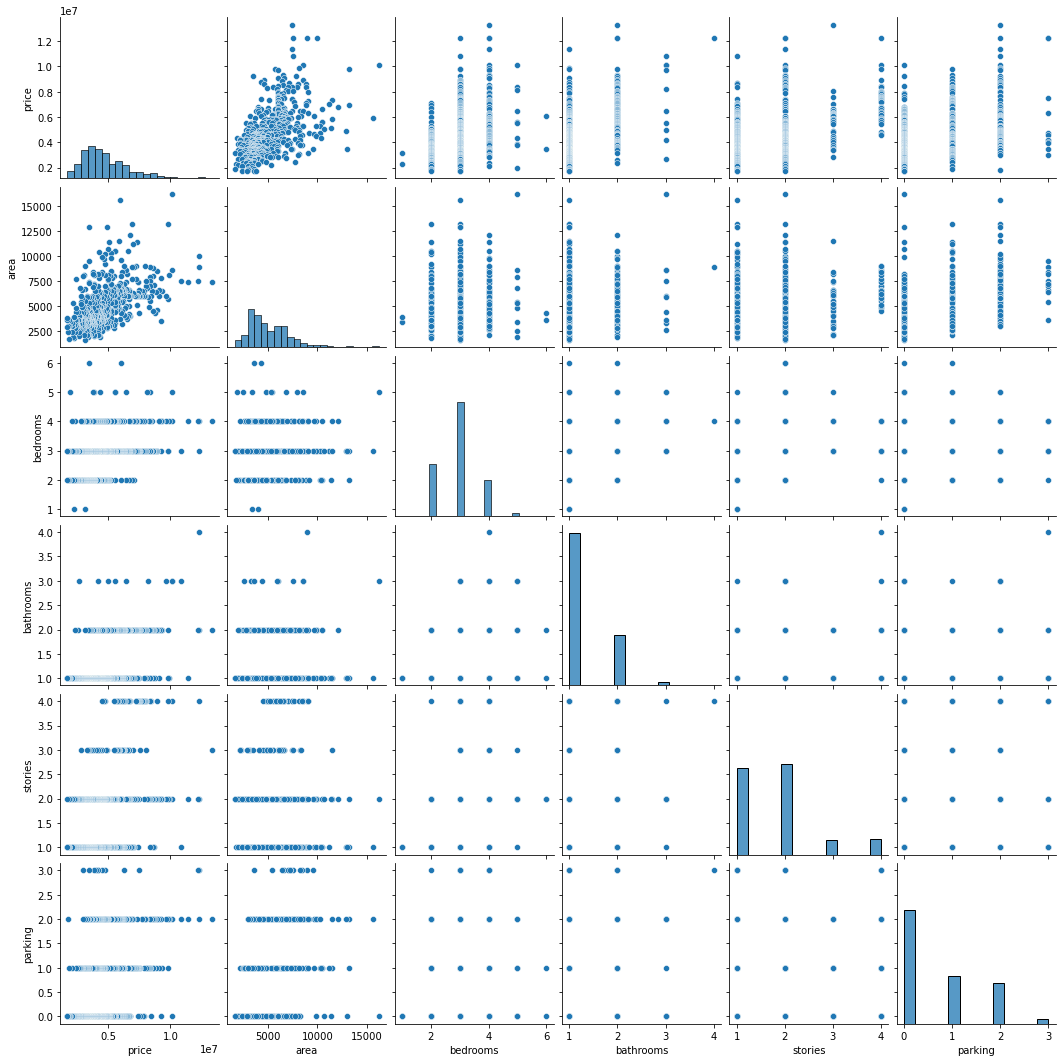

In [6]:
#visualisation

sns.pairplot(housing)

plt.show()

In [7]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
#encoding

varl =['mainroad' ,'guestroom' , 'basement' ,'hotwaterheating' , 'airconditioning','prefarea']
housing[varl].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [9]:
housing[varl]  =housing[varl].apply(lambda x:x.map({'yes': 1, 'no' : 0}))
housing[varl].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [11]:
#dummy variable 
#drop first variable  (k,k-1)

status = pd.get_dummies(housing['furnishingstatus'] , drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
housing = pd.concat([housing , status] , axis =1)

In [13]:
housing = housing.drop('furnishingstatus' , axis = 1)

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [15]:
#split into test and train

df_test , df_train  = train_test_split(housing , train_size=0.7 , random_state=100)
print(df_test.shape)
print(df_train.shape)

(381, 14)
(164, 14)


In [16]:
#minmax Scaling
scaler = MinMaxScaler()

#num list
num_list = ["area" , 'bedrooms' , 'stories' , 'bathrooms' , 'parking' , 'price' ]


df_train[num_list] = scaler.fit_transform(df_train[num_list])


In [17]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0


<AxesSubplot:>

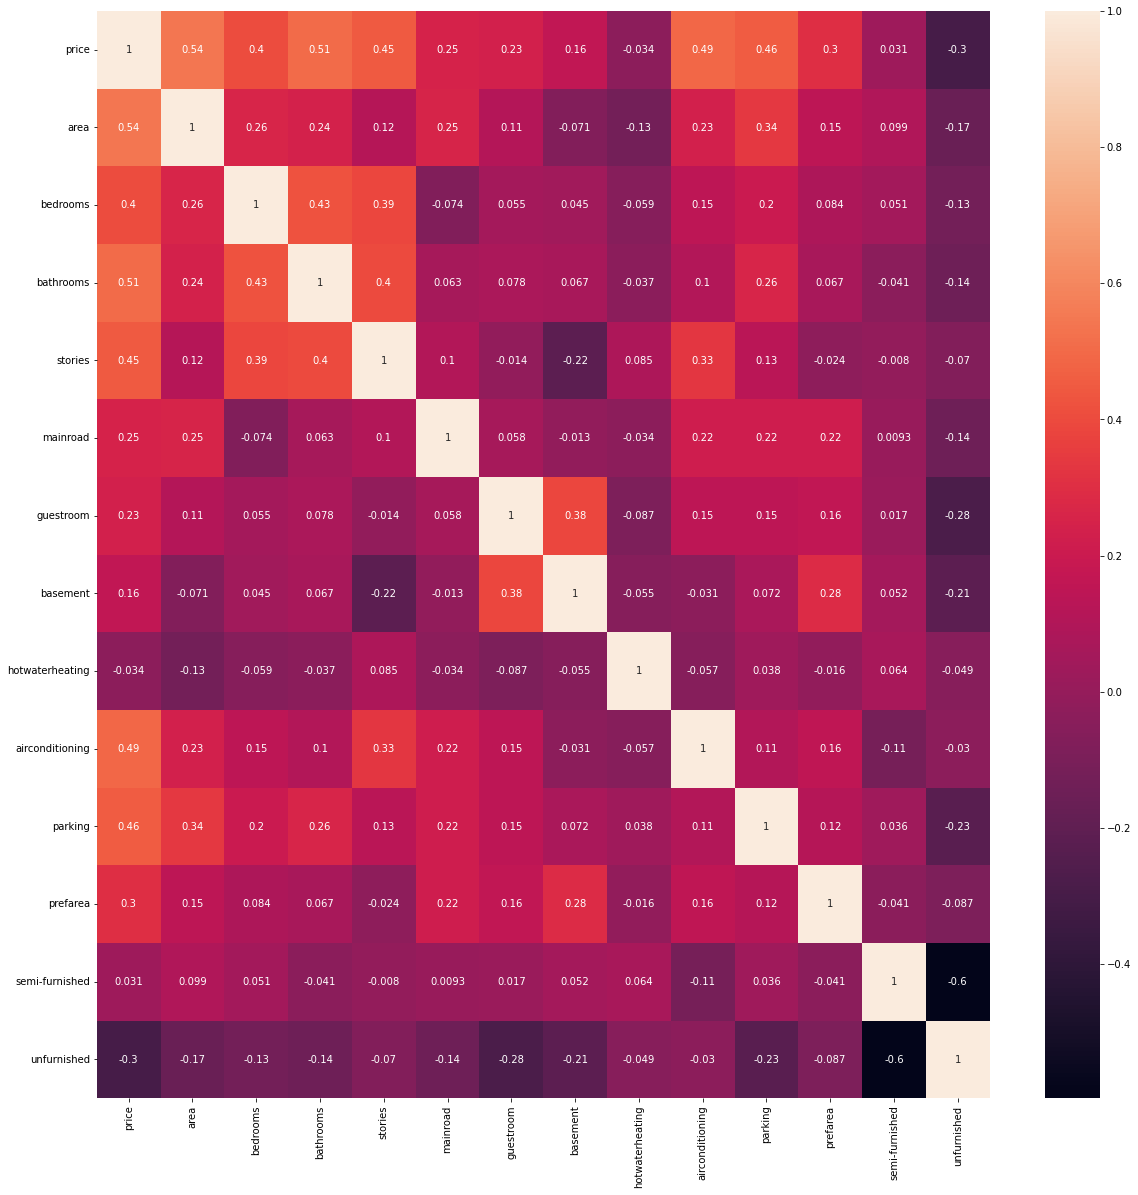

In [22]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr() ,annot = True , )

In [31]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0


In [32]:
y_train.head()

265    0.247651
54     0.530201
171    0.328859
244    0.261745
268    0.245638
Name: price, dtype: float64

In [40]:
# training 

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     28.19
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           7.50e-34
Time:                        21:00:32   Log-Likelihood:                 141.06
No. Observations:                 164   AIC:                            -254.1
Df Residuals:                     150   BIC:                            -210.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0563      0.036      1.573      0.118      -0.014       0.127
area                0.3558      0.059      5.984      0.000       0.238       0.473
bedrooms            0.0317      0.041      0.771      0.442      -0.049       0.113
bathrooms           0.2143      0.054      3.966      0.000       0.108       0.321
stories             0.1536      0.038      4.018      0.000       0.078       0.229
mainroad           -0.0027      0.027     -0.098      0.922      -0.056       0.051
guestroom           0.0019      0.024      0.078      0.938      -0.046       0.050
basement            0.0578      0.021      2.758      0.007       0.016       0.099
hotwaterheating     0.0138      0.050      0.275      0.784      -0.085       0.113
airconditioning     0.1105      0.020      5.587      0.000       0.071       0.150
parking             0.1145      0.033      3.511      0.001       0.050       0.179
prefarea            0.0547      0.021      2.549      0.012       0.012       0.097
semi-furnished     -0.0213      0.022     -0.955      0.341      -0.065       0.023
unfurnished        -0.0584      0.025     -2.354      0.020      -0.107      -0.009
==============================================================================
Omnibus:                       16.563   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.582
Skew:                           0.606   Prob(JB):                     1.25e-05
Kurtosis:                       4.356   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values , i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif

,feature,VIF
0,area,4.33
1,bedrooms,3.94
2,bathrooms,1.92
3,stories,3.05
4,mainroad,5.56
5,guestroom,1.61
6,basement,2.03
7,hotwaterheating,1.08
8,airconditioning,1.98
9,parking,1.91


In [50]:
X = X_train.drop('mainroad' , axis =1)


In [47]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     30.74
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.32e-34
Time:                        21:10:40   Log-Likelihood:                 141.06
No. Observations:                 164   AIC:                            -256.1
Df Residuals:                     151   BIC:                            -215.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0541      0.028      1.950      0.053      -0.001       0.109
area                0.3549      0.058      6.073      0.000       0.239       0.470
bedrooms            0.0325      0.040      0.814      0.417      -0.046       0.111
bathrooms           0.2143      0.054      3.979      0.000       0.108       0.321
stories             0.1533      0.038      4.039      0.000       0.078       0.228
guestroom           0.0020      0.024      0.083      0.934      -0.046       0.050
basement            0.0579      0.021      2.773      0.006       0.017       0.099
hotwaterheating     0.0140      0.050      0.280      0.780      -0.085       0.113
airconditioning     0.1103      0.020      5.637      0.000       0.072       0.149
parking             0.1140      0.032      3.542      0.001       0.050       0.178
prefarea            0.0543      0.021      2.584      0.011       0.013       0.096
semi-furnished     -0.0212      0.022     -0.955      0.341      -0.065       0.023
unfurnished        -0.0581      0.025     -2.366      0.019      -0.107      -0.010
==============================================================================
Omnibus:                       16.410   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.325
Skew:                           0.601   Prob(JB):                     1.42e-05
Kurtosis:                       4.349   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif

,feature,VIF
0,area,3.80
1,bedrooms,3.94
2,bathrooms,1.92
3,stories,2.93
4,guestroom,1.60
5,basement,1.97
6,hotwaterheating,1.08
7,airconditioning,1.94
8,parking,1.85
9,prefarea,1.51


In [53]:
X = X_train.drop(['guestroom' , 'mainroad'] , axis =1)

In [54]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     33.76
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.23e-35
Time:                        21:13:29   Log-Likelihood:                 141.06
No. Observations:                 164   AIC:                            -258.1
Df Residuals:                     152   BIC:                            -220.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0545      0.027      1.992      0.048       0.000       0.109
area                0.3552      0.058      6.112      0.000       0.240       0.470
bedrooms            0.0324      0.040      0.815      0.416      -0.046       0.111
bathrooms           0.2142      0.054      3.991      0.000       0.108       0.320
stories             0.1533      0.038      4.053      0.000       0.079       0.228
basement            0.0585      0.020      2.970      0.003       0.020       0.097
hotwaterheating     0.0137      0.050      0.276      0.783      -0.084       0.112
airconditioning     0.1105      0.019      5.702      0.000       0.072       0.149
parking             0.1141      0.032      3.560      0.000       0.051       0.177
prefarea            0.0543      0.021      2.593      0.010       0.013       0.096
semi-furnished     -0.0214      0.022     -0.980      0.328      -0.065       0.022
unfurnished        -0.0586      0.024     -2.468      0.015      -0.106      -0.012
==============================================================================
Omnibus:                       16.234   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.969
Skew:                           0.598   Prob(JB):                     1.70e-05
Kurtosis:                       4.336   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif

,feature,VIF
0,area,3.74
1,bedrooms,3.94
2,bathrooms,1.92
3,stories,2.92
4,basement,1.66
5,hotwaterheating,1.07
6,airconditioning,1.91
7,parking,1.84
8,prefarea,1.51
9,semi-furnished,2.04


In [56]:
X = X_train.drop(['guestroom' , 'mainroad','hotwaterheating'] , axis =1)

In [57]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     37.35
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.67e-36
Time:                        21:14:34   Log-Likelihood:                 141.01
No. Observations:                 164   AIC:                            -260.0
Df Residuals:                     153   BIC:                            -225.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0554      0.027      2.044      0.043       0.002       0.109
area                0.3530      0.057      6.149      0.000       0.240       0.466
bedrooms            0.0317      0.040      0.801      0.424      -0.047       0.110
bathrooms           0.2136      0.053      3.996      0.000       0.108       0.319
stories             0.1545      0.037      4.127      0.000       0.081       0.229
basement            0.0582      0.020      2.969      0.003       0.019       0.097
airconditioning     0.1102      0.019      5.713      0.000       0.072       0.148
parking             0.1149      0.032      3.608      0.000       0.052       0.178
prefarea            0.0545      0.021      2.611      0.010       0.013       0.096
semi-furnished     -0.0212      0.022     -0.973      0.332      -0.064       0.022
unfurnished        -0.0588      0.024     -2.484      0.014      -0.106      -0.012
==============================================================================
Omnibus:                       17.731   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.051
Skew:                           0.627   Prob(JB):                     3.63e-06
Kurtosis:                       4.447   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif



,feature,VIF
0,area,3.71
1,bedrooms,3.94
2,bathrooms,1.91
3,stories,2.86
4,basement,1.66
5,airconditioning,1.90
6,parking,1.82
7,prefarea,1.51
8,semi-furnished,2.01
9,unfurnished,1.52


In [59]:
#residual analysis

y_train_predict = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

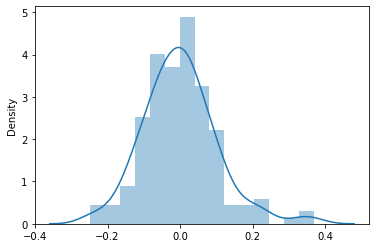

In [60]:
res = y_train-y_train_predict

sns.distplot(res)

In [61]:
#prediction and testing

#num list
num_list = ["area" , 'bedrooms' , 'stories' , 'bathrooms' , 'parking' , 'price' ]


df_test[num_list] = scaler.transform(df_test[num_list])

In [62]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.181208,0.134021,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.674497,0.327835,0.333333,0.333333,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.348993,0.103093,0.333333,0.333333,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.600282,0.367698,0.333333,0.333333,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.630872,0.432990,1.000000,0.333333,0.333333,1,0,1,1,0,0.666667,0,0,1


In [63]:
y_test = df_test.pop('price')
X_test = df_test

In [65]:
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.134021,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,0,0,1
19,1.0,0.327835,0.333333,0.333333,0.333333,1,0,0,0,1,0.333333,1,1,0
159,1.0,0.103093,0.333333,0.333333,0.000000,1,1,1,0,1,0.000000,0,0,0
35,1.0,0.367698,0.333333,0.333333,1.000000,1,0,0,0,1,0.666667,0,0,0
28,1.0,0.432990,1.000000,0.333333,0.333333,1,0,1,1,0,0.666667,0,0,1


In [66]:
X_test_sm = X_test_sm.drop(['guestroom' , 'mainroad','hotwaterheating'] , axis =1)

In [67]:
#pridiction
y_test_pridict  = lr_model.predict(X_test_sm)

In [71]:
r2_score(y_true=y_test , y_pred= y_test_pridict )

0.6185747474364621